<a href="https://colab.research.google.com/github/Pupuyan/bg_peter_test/blob/main/BG_matting_Peter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown -q

In [2]:
!gdown https://drive.google.com/uc?id=1-t9SO--H4WmP7wUl1tVNNeDkq47hjbv4 -O model.pth -q
!gdown https://drive.google.com/uc?id=1g_n7kzDppAA2BNwUfit0eVKXLHRVBOw- -O src.png -q
!gdown https://drive.google.com/uc?id=1ywAx_GKGswFQjt3rWBLjdLtzjrjiOWpG -O bgr.png -q

In [3]:
import torch
from torchvision.transforms.functional import to_tensor, to_pil_image
from PIL import Image

In [4]:
def peter_bg_matting(bgr_name, src_name, test_folder = "/content/drive/MyDrive/"):
    model = torch.jit.load('model.pth').cuda().eval()

    src_location = test_folder + src_name
    bgr_location = test_folder + bgr_name
    src = Image.open(src_location)
    bgr = Image.open(bgr_location)

    src = to_tensor(src).cuda().unsqueeze(0)
    bgr = to_tensor(bgr).cuda().unsqueeze(0)

    if src.size(2) <= 2048 and src.size(3) <= 2048:
        model.backbone_scale = 1/4
        model.refine_sample_pixels = 80_000
    else:
        model.backbone_scale = 1/8
        model.refine_sample_pixels = 320_000
    
    pha, fgr = model(src, bgr)[:2]
    com = pha * fgr + (1 - pha) * torch.tensor([120/255, 255/255, 155/255], device='cuda').view(1, 3, 1, 1)
    
    return to_pil_image(com[0].cpu())

In [ ]:
coke2_bgr = 'coke2_bgr.jpg'
coke2_src = 'coke2_src.jpg'



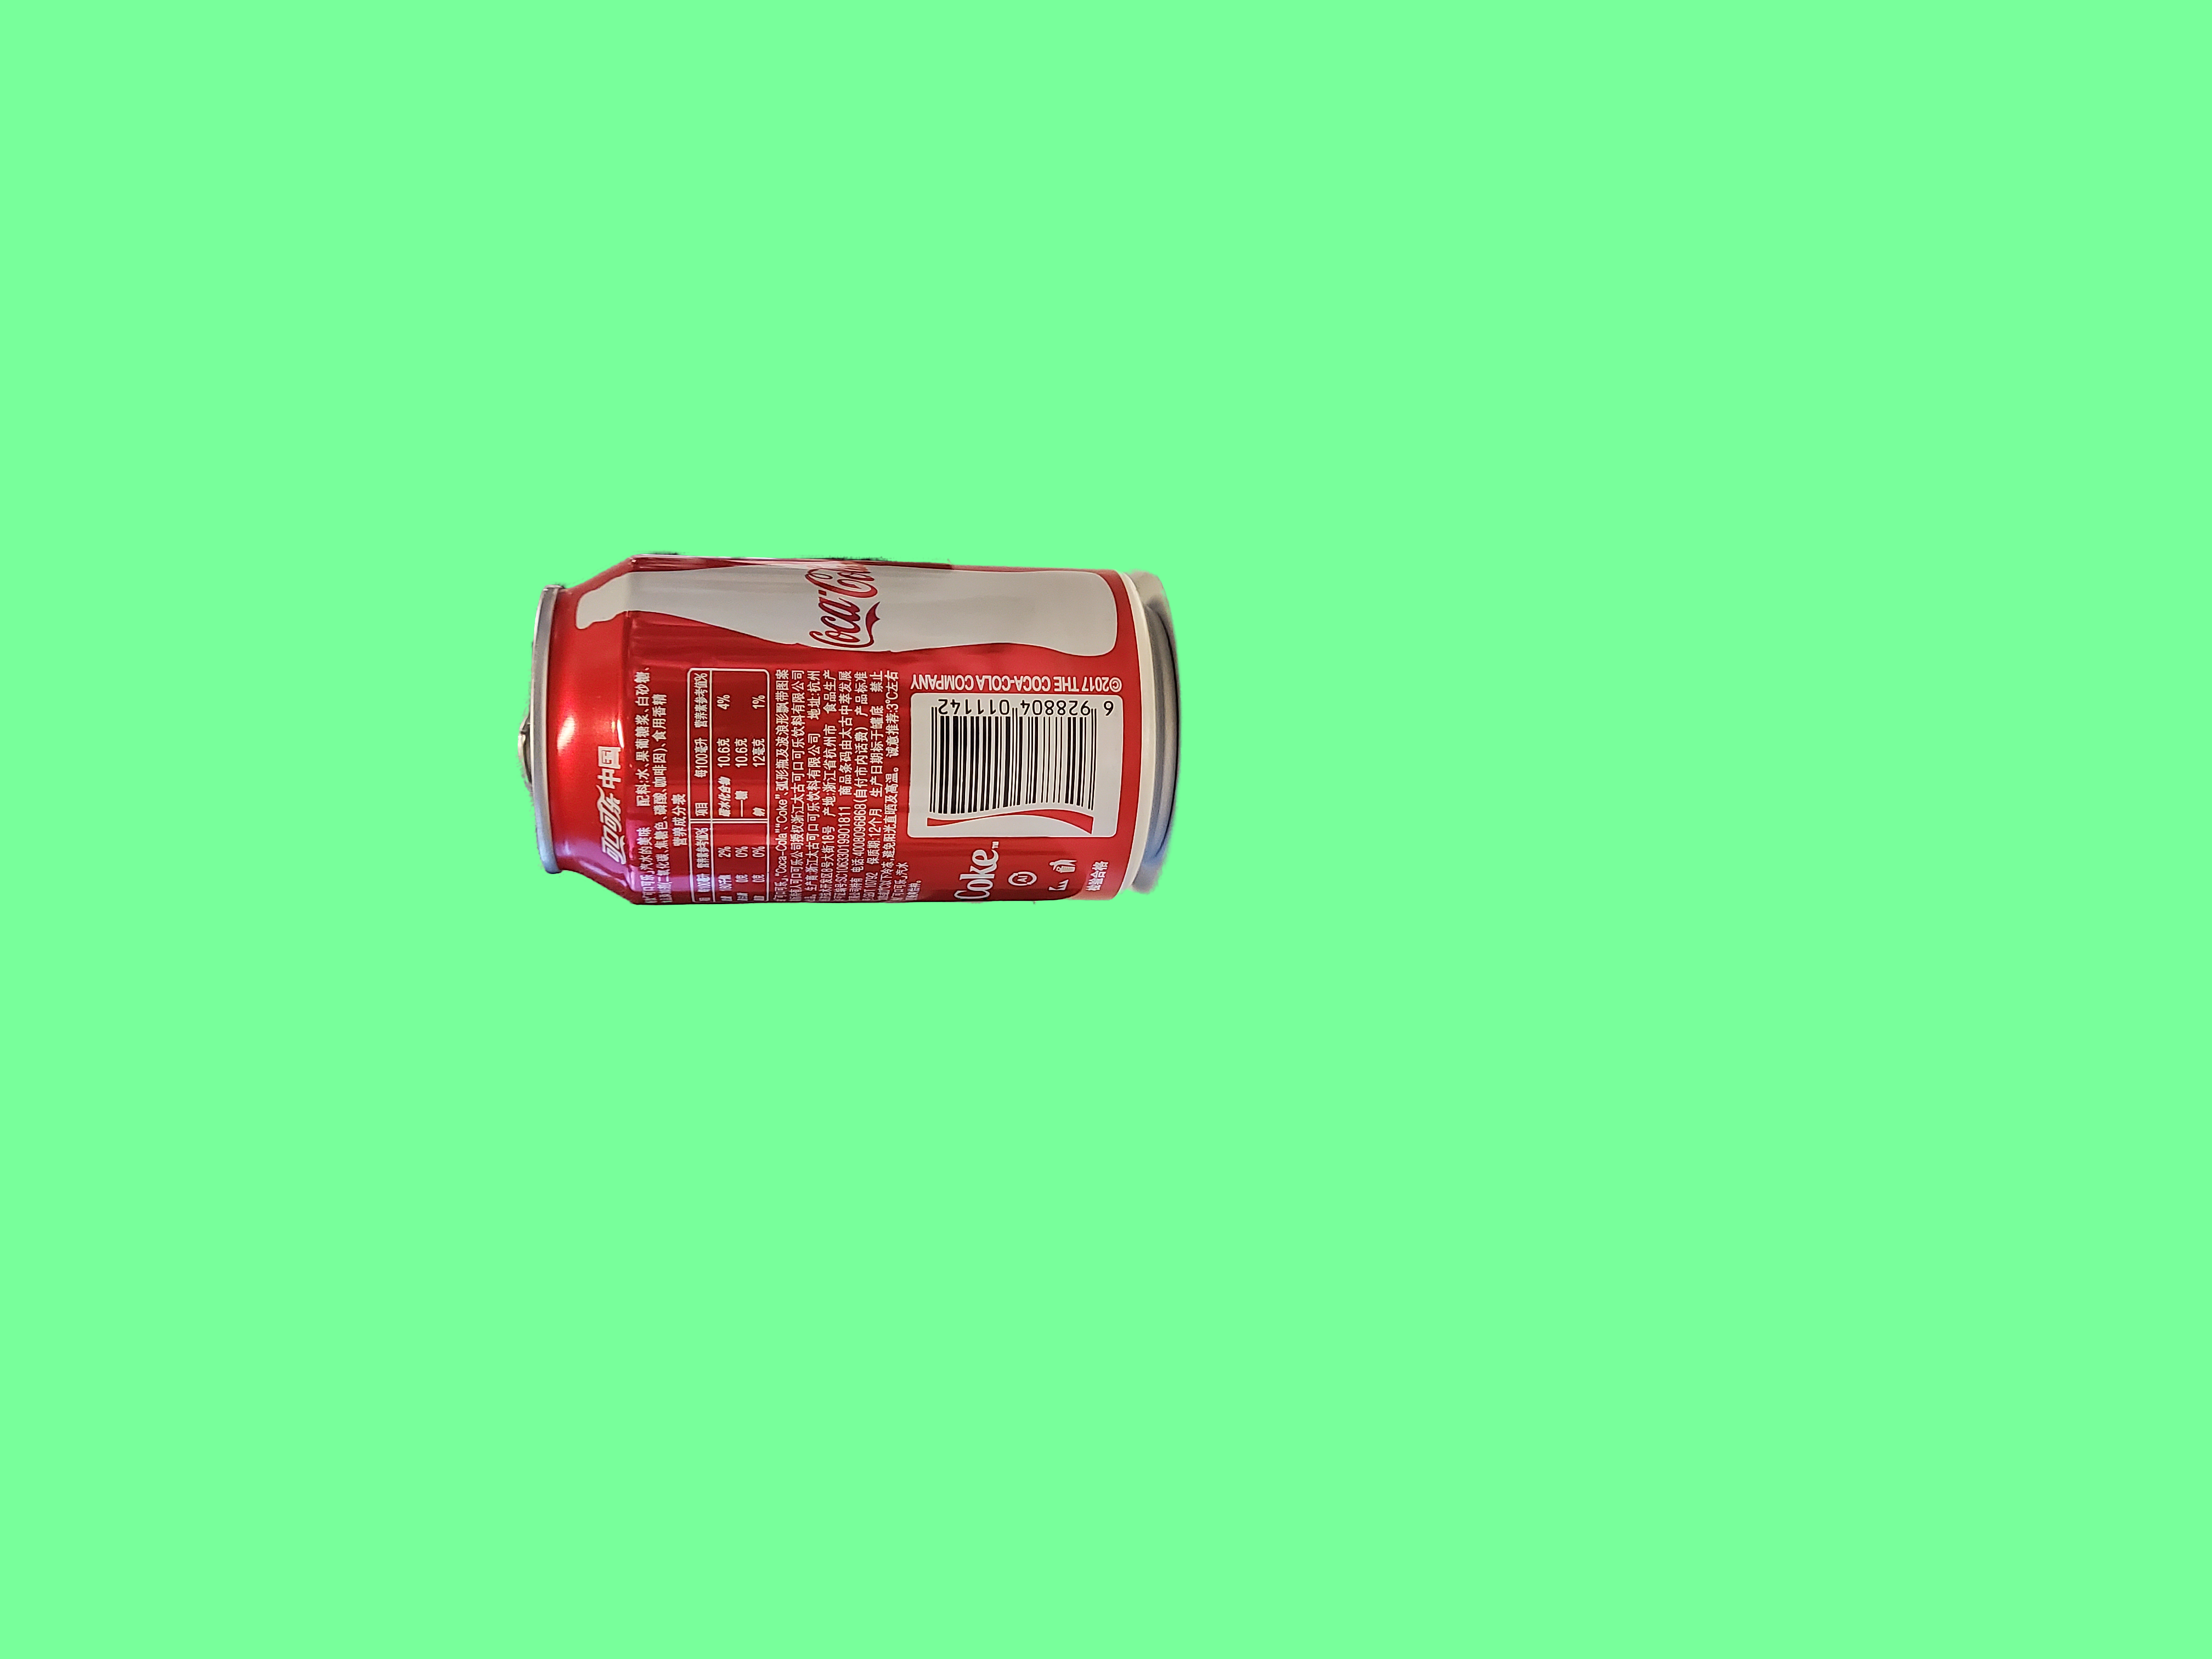

In [5]:
peter_bg_matting('coke2_bgr.jpg','coke2_src.jpg')